# Import Packages

In [1]:
# built-in
from datetime import datetime, timedelta
import os.path

# third-party (pip install required)
import matplotlib
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import pandas as pd
from pymodulon.io import load_json_model

# set matplotlib params
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

# Load Data

In [2]:
PRECISE_PATH = '../../data/precise/'
P1K_PATH = '../../data/precise1k/'
FIG_PATH =  'summarize_dataset_figs'

In [3]:
precise1 = load_json_model(os.path.join(PRECISE_PATH, 'precise.json.gz'))
p1k = load_json_model(os.path.join(P1K_PATH, 'precise1k.json.gz'))

# Dataset Growth

In [4]:
precise_metadata_sorted = precise1.sample_table.sort_values('run_date')
p1k_metadata_sorted = p1k.sample_table.sort_values('run_date')

order = pd.DataFrame(precise_metadata_sorted.study.unique(), columns = ['study'])
counts = pd.DataFrame(precise_metadata_sorted.groupby(['study']).count()['condition'])
new_1= order.merge(counts, on = 'study')

order = pd.DataFrame(p1k_metadata_sorted.study.unique(), columns = ['study'])
counts = pd.DataFrame(p1k_metadata_sorted.groupby(['study']).count()['condition'])
new_2 = order.merge(counts, on = 'study')

precise_metadata_sorted["Version"] = "PRECISE"
p1k_metadata_sorted["Version"] = "PRECISE-1000"

all_df = pd.concat([precise_metadata_sorted, p1k_metadata_sorted])
all_df['run_date']= pd.to_datetime(all_df['run_date'])
all_df = all_df.sort_values('run_date')
all_df['Cumulative_Condition_Count'] = [i+1 for i in range(len(all_df))]

p1_cum = []
counter = 0
for i in all_df.Version:
    if i == 'PRECISE':
        counter += 1
    p1_cum.append(counter)
    
all_df["cumulative_P1"] = p1_cum

p1k_cum = []
counter = 0
for i in all_df.Version:
    if i == 'PRECISE-1000':
        counter += 1
    p1k_cum.append(counter)
    
all_df["cumulative_P1K"] = p1k_cum

# add a dummy row to get to 2021
all_df = all_df.append({
    'run_date': datetime(2021,6,1), 'cumulative_P1K': all_df['cumulative_P1K'].max(), 'cumulative_P1': all_df['cumulative_P1'].max()
}, ignore_index=True)

/var/folders/ts/jx8__t2j39bdz86p320tyc5w0000gn/T/ipykernel_99305/2621842418.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append({


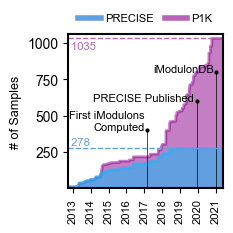

In [5]:
fig, ax = plt.subplots(figsize = (2,2))
ax.set_ylim(0,1060)
ax.set_xlim(min(all_df.run_date), max(all_df.run_date))
plt.fill_between(all_df.run_date, all_df.cumulative_P1K, color = 'darkmagenta', alpha=0.5,lw=2)
plt.fill_between(all_df.run_date, all_df.cumulative_P1, color = 'deepskyblue', alpha=0.5, lw=2)
ax.set_ylabel('# of Samples', fontsize=9)
ax.set_yticks([250, 500, 750, 1000])
markerline, stemlines, baseline = ax.stem(
    [datetime(2017, 3, 1), datetime(2019, 12, 4), datetime(2021, 1, 8)], [400, 600, 800]
)
plt.setp(stemlines, 'linewidth', 0.5)
plt.setp(markerline, 'markersize', 2)
plt.setp(markerline, 'color', 'k')
plt.setp(stemlines, 'color', 'k')
ax.text(datetime(2017, 3, 1)-timedelta(50), 400, 'First iModulons\nComputed', ha='right', fontsize=8)
ax.text(datetime(2019, 12, 4)-timedelta(50), 600, 'PRECISE Published', ha='right', fontsize=8)
ax.text(datetime(2021, 1, 8)-timedelta(50), 800, 'iModulonDB', ha='right', fontsize=8)
custom_lines = [Line2D([0], [0], color='#619fe1', lw=4),
                Line2D([0], [0], color='#b763b7', lw=4)]
name = ['PRECISE', 'P1K']
args = {'handles':custom_lines,'labels':name,'loc':2,'ncol':2,
        'bbox_to_anchor':(0,1.2),'fontsize':8}
ax.legend(**args,  columnspacing=1, handletextpad=.4,
          frameon=False, labelspacing=0.11)

ax.axhline(y=(1035), xmax=1, color ='#b763b7', linestyle = '--', linewidth = 1)
ax.text(all_df.run_date.iloc[15],960,s=' 1035', fontsize =8, color ='#b763b7')
ax.axhline(y=(278), color ='#619fe1', linestyle = '--', linewidth = 1)
ax.text(all_df.run_date.iloc[15],300,s=' 278', fontsize =8, color ='#619fe1')

for s in ax.spines.values():
    s.set_color('black')
    s.set_linewidth(1.5)

ax.tick_params(axis='x', rotation=90, labelsize=8)
plt.savefig(os.path.join(FIG_PATH, 'dataset_growth.svg'), dpi = 400, bbox_inches = 'tight')
plt.savefig(os.path.join(FIG_PATH, 'dataset_growth.png'), dpi = 400, bbox_inches = 'tight')

# Condition Overview

## Figure

/var/folders/ts/jx8__t2j39bdz86p320tyc5w0000gn/T/ipykernel_99305/2593702628.py:34: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, (col_val, col_count) in enumerate(col_counts.iteritems()):
/var/folders/ts/jx8__t2j39bdz86p320tyc5w0000gn/T/ipykernel_99305/2593702628.py:34: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, (col_val, col_count) in enumerate(col_counts.iteritems()):
/var/folders/ts/jx8__t2j39bdz86p320tyc5w0000gn/T/ipykernel_99305/2593702628.py:34: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, (col_val, col_count) in enumerate(col_counts.iteritems()):
/var/folders/ts/jx8__t2j39bdz86p320tyc5w0000gn/T/ipykernel_99305/2593702628.py:34: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, (col_val, col_count) in enumerate(col_counts.iteritems(

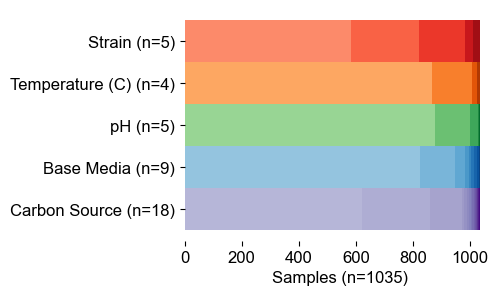

In [6]:
sample_table_for_plot = p1k.sample_table.copy()

sample_table_for_plot['Carbon Source'] = sample_table_for_plot['Carbon Source (g/L)'].apply(
    lambda cs: cs.split('(')[0] if pd.notna(cs) else None
)
sample_table_for_plot['Carbon Source'] = sample_table_for_plot['Carbon Source'].fillna('rich')
sample_table_for_plot['Nitrogen Source'] = sample_table_for_plot['Nitrogen Source (g/L)'].apply(
    lambda cs: cs.split('(')[0] if pd.notna(cs) else None
)
sample_table_for_plot['Carbon Source'] = sample_table_for_plot['Carbon Source'].fillna('rich')
sample_table_for_plot['Supplement'] = sample_table_for_plot['Supplement'].apply(
    lambda sup: sup.split('(')[0].strip() if pd.notna(sup) else None
)

_, ax = plt.subplots(figsize=(4, 3))

col_to_cmap = {
    'Strain': 'Reds',
    'Temperature (C)': 'Oranges',
    'pH': 'Greens',
    'Base Media': 'Blues',
    'Carbon Source': 'Purples'
}

labs = []
for i, (col, cmap_for_col) in enumerate(col_to_cmap.items()):

    cmap_to_use = get_cmap(cmap_for_col)
    bottom = 0
    col_counts = sample_table_for_plot[col].value_counts()
    labs.append(f'{col} (n={col_counts.shape[0]})')
    min_col_i, max_col_i = 0.4, 1
    inc = (max_col_i - min_col_i) / col_counts.shape[0]
    for j, (col_val, col_count) in enumerate(col_counts.iteritems()):
        ax.barh(len(col_to_cmap) - i, col_count, left=bottom, height=1, label=col_val, color=cmap_to_use(((min_col_i + j * inc))))
        bottom += col_count

ax.set_xlabel('Samples (n=1035)', fontsize=12)
ax.set_yticks(range(1, len(col_to_cmap) + 1))
ax.set_yticklabels(labs[::-1])
ax.tick_params(axis='both', labelsize=12)
for s in ax.spines.values():
    s.set_visible(False)
    
plt.savefig(os.path.join(FIG_PATH, 'condition_bars.svg'), dpi = 400, bbox_inches = 'tight')
plt.savefig(os.path.join(FIG_PATH, 'condition_bars.png'), dpi = 400, bbox_inches = 'tight')

## Table

In [7]:
p1k.sample_table['Evolved Sample'].value_counts()

No          614
Endpoint    368
Midpoint     53
Name: Evolved Sample, dtype: int64

In [8]:
p1k.sample_table['Strain Description'].str.contains('del').sum()

288

In [9]:
p1k.sample_table['Base Media'].value_counts()

M9            825
Medium C      122
LB             36
W2             12
RPMI+10%LB     10
CAMHB          10
01xLB           8
TMA             8
M9P             4
Name: Base Media, dtype: int64

In [10]:
p1k.sample_table['Culture Type'].value_counts()

Batch        948
Fed-batch     82
Chemostat      5
Name: Culture Type, dtype: int64

## Bar Charts by Column

In [11]:
def col_bar_chart(col, filename):

    val_counts = sample_table_for_plot[col].fillna('NA').value_counts().sort_values()
    if len(val_counts) > 10:
        figsize=(3, 4.5)
    else:
        figsize=(3, 3)
    _, ax = plt.subplots(figsize=figsize)
    
    val_counts.plot(ax=ax, kind='barh')
    for s in ax.spines.values():
        s.set_linewidth(1)
        s.set_color('k')

    for i, (val, count) in enumerate(val_counts.iteritems()):
        ax.text(x=count + 5, y=i, s=count, va='center', fontsize=10)

    ax.set_xlim(left=0, right=p1k.sample_table.shape[0] + 25)
    ax.set_xlabel('# Samples')
    ax.set_ylabel(col)
    
    plt.savefig(os.path.join(FIG_PATH, f"{filename}_bars.svg"), dpi = 400, bbox_inches = 'tight')
    plt.savefig(os.path.join(FIG_PATH, f"{filename}_bars.png"), dpi = 400, bbox_inches = 'tight')

In [12]:
cols_to_plot = ['Strain', 'Culture Type', 'Evolved Sample', 'Base Media', 'Temperature (C)', 'pH', 'Carbon Source', 'Nitrogen Source']
fnames = ['strain', 'culture_type', 'evolved', 'media', 'temp', 'ph', 'carbon_source', 'nitrogen_source']

/var/folders/ts/jx8__t2j39bdz86p320tyc5w0000gn/T/ipykernel_99305/907041430.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (val, count) in enumerate(val_counts.iteritems()):
/var/folders/ts/jx8__t2j39bdz86p320tyc5w0000gn/T/ipykernel_99305/907041430.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (val, count) in enumerate(val_counts.iteritems()):
/var/folders/ts/jx8__t2j39bdz86p320tyc5w0000gn/T/ipykernel_99305/907041430.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (val, count) in enumerate(val_counts.iteritems()):
/var/folders/ts/jx8__t2j39bdz86p320tyc5w0000gn/T/ipykernel_99305/907041430.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (val, count) in enumerate(val_counts.iteritems()):
/var/folders/ts/jx8__t2j39bdz86p

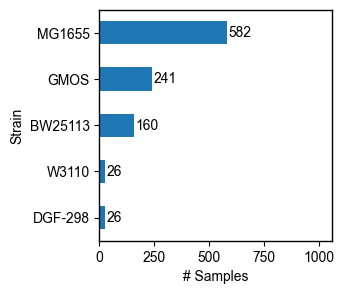

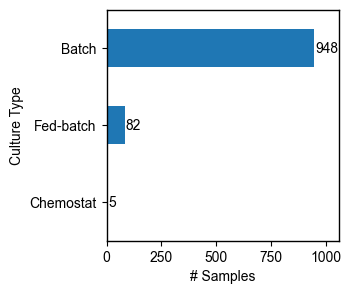

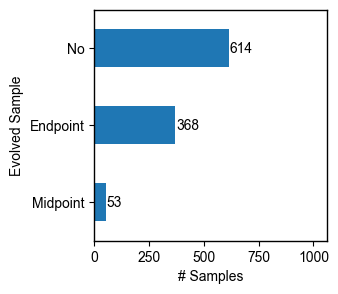

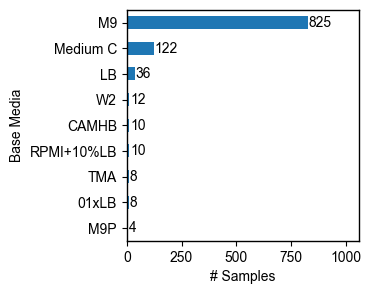

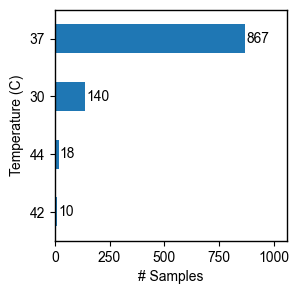

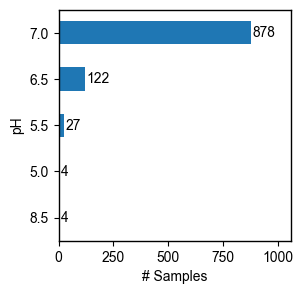

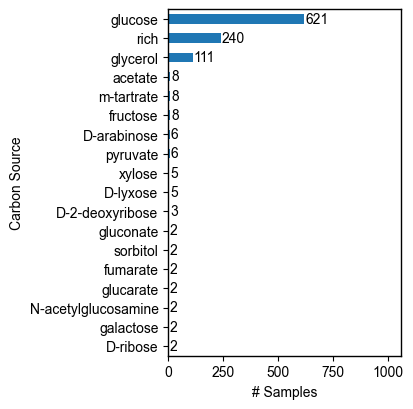

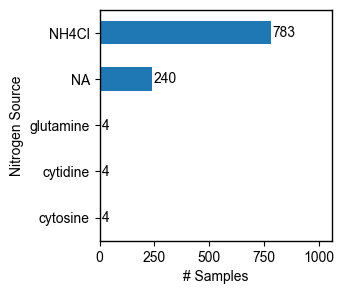

In [13]:
for col, fname in zip(cols_to_plot, fnames):
    col_bar_chart(col, fname)